# ZPUng - a compact stack machine CPU

The ZPUng is a pipelined variant based on the ZPU architecture. This requires the ZPUng package.

In [1]:
import sys
sys.path.append("../../zpung")
sys.path.insert(0, "../../../../..")

Create configuration:

## Instruction decoder

### Synthesis of the instruction decoder


In [2]:
from myhdl import *
from zpuvliw import execute_vliw
from zpudecode import t_mode, instruction_decode
from zpulib import Instruction


def convert(design):
    insn = Signal(Instruction())
    clk = Signal(bool(0))
    irq = Signal(bool(0))
    imm = Signal(intbv(0, min=-64, max=64))
    func = Signal(intbv(0)[3:0])
    mode = Signal(t_mode.M_NOP)

    inst_decode = instruction_decode(clk, insn, mode, func, imm)


    inst_decode.convert("yosys_module", design, name="decode", trace=True)

from myhdl.conversion import yshelper

yshelper.DebugOutput.debug = False

design = yshelper.Design("exec")
convert(design)


CREATE Module: 'decode'
Adding module with name: instruction_decode_1_8_5_3_7
CONVERT_RTL tree >>>>>> 'DECODE_WORKER' 
DONE instancing submodules


### RTL Display

Generating RTL image...
Display...


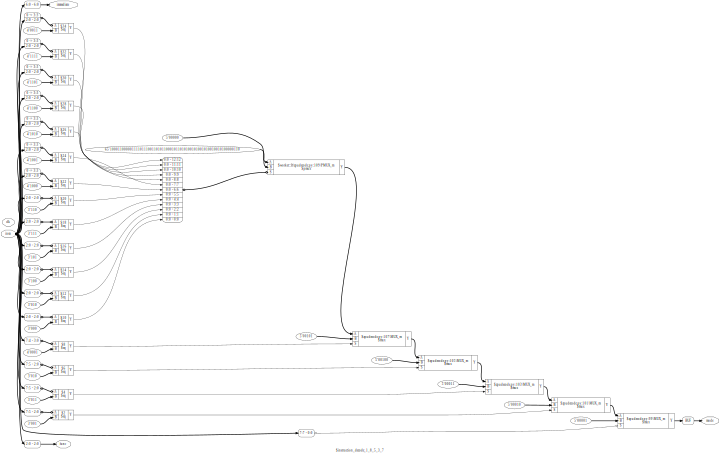

In [3]:
from ys_aux import to_svg
display(to_svg(design, "", 100))

## Execute unit

In [4]:
from myhdl import *

from zpu import ZPUng
from zpulib import Instruction

from tap import Tap
from ramio import DmemPort, ImemPort, IOmemPort

import config

BRAM_ADDR_W = config.CONFIG_BRAM_ADDR_WIDTH
ADDR_W      = config.CONFIG_ADDR_WIDTH


def convert(design):
    clk = Signal(bool(0))
    irq = Signal(bool(0))
    override = Signal(bool(0))
    exc = Signal(bool(0))
    cache_wait = Signal(bool(0))
    ena_emu = Signal(bool(0))
    dbgcount = Signal(intbv()[32:])
    debug_cycle_done = Signal(bool(0))
    mem_busy = Signal(bool(0))
    lastpc = Signal(intbv(0)[32:])
    reset = ResetSignal(0, 1, False)
    # iaddr = Signal(intbv(0, min=0, max=2**PROGRAM_MEMORY_ADDRBITS))
    # idata = Signal(Dreg())
    evaddr = Signal(intbv()[BRAM_ADDR_W:0]) # IRQ vector address

    tap = Tap(Instruction(0xb))
    imem = ImemPort(ADDR_W)
    iomem = IOmemPort(ADDR_W-2) # 32 bit access width

    inst_cpu = ZPUng(clk, tap, reset, irq, override, exc, cache_wait, imem, iomem, evaddr)

    inst_cpu.convert("yosys_module", design, name="ZPUng", trace=True)


from myhdl.conversion import yshelper
design = yshelper.Design("test")
convert(design)    
    

Legacy class tap
Legacy class imem
Legacy class mmr
CREATE Module: 'ZPUng'
Legacy class tap
Legacy class imem
Legacy class mmr
Adding module with name: ZPUng_1_1_1_1_1_1_14
CONVERT_RTL tree >>>>>> 'ZPUNG_ASSIGN' 
Legacy class evt
Legacy class pa
Legacy class pb
++++++++  execute_vliw_1_1_1_1_1_5_5_3_18_18_7_32_14_1  ++++++++
Unused signal: dbg
unconnected (internal) wire acc
unconnected (internal) wire aluop
unconnected (internal) wire busy
unconnected (internal) wire idim
unconnected (internal) wire idim_save
unconnected (internal) wire idst0
unconnected (internal) wire idst1
unconnected (internal) wire in_exc
unconnected (internal) wire in_reset
unconnected (internal) wire in_ucode
Unused signal: irq
unconnected (internal) wire irqack
unconnected (internal) wire irqlatch
Unused signal: irqprio
unconnected (internal) wire is_im
unconnected (internal) wire nextpc
unconnected (internal) wire nextstate
unconnected (internal) wire offset
unconnected (internal) wire ptr
unconnected (intern

ConversionError: in file ../../zpung/zpuvliw.py, line 439:
    Unsupported (signal?) argument type for wr()